In [1]:
%matplotlib notebook

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
client = Client("IRIS")
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np
import math
import pandas as pd

def short_waveforms(starttime, endtime):
    start_t = UTCDateTime(starttime)
    end_t = UTCDateTime(endtime)
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text
    
def waveform_plotter(date, filtered, event, ax, ylim = False, channels = [0,1,2]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        offset = channel * np.full(len(filtered[channel]), fill_value=200) 
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#1f77b4", alpha = 0.7)
        elif code == 'BHV':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#ff7f0e", alpha = 0.7)
        elif code == 'BHW':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#2ca02c", alpha = 0.7)
        else:
            ax.plot(t, filtered[channel].data + offset, label="Unknown " + code, color = "black", alpha = 0.7)
    
    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
    
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)
    
    if ylim == True:
        ax.set_ylim(-800,1000)

    ax.set_title("S0" + event + "\n" + "UTC " + d, size=10)
    ax.legend
    
def xyz_plotter(date, filtered, event, ax, ylim = False, channels=[0,1,2]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            U = filtered[channel].data
        elif code == 'BHV':
            V = filtered[channel].data
        elif code == 'BHW':
            W = filtered[channel].data
            
    h1 = (-2)*U + V + W
    h2 = math.sqrt(3)*V - math.sqrt(3)*W
    z = math.sqrt(2)*U + math.sqrt(2)*V + math.sqrt(2)*W

    offset = np.full(len(z), fill_value=500)

    ax.plot(t, h1 + 2*offset, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
    ax.plot(t, h2 + offset, label='Horizontal 2', color = "#aff8d8", alpha = 0.8)
    ax.plot(t, z, label = 'Vertical', color = "#ffabab", alpha = 0.8)


    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
    
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)

    if ylim == True:
        ax.set_ylim(-1800,2000)

    ax.set_title("S0" + event + "\n" + "UTC " + d, size=10)
    ax.legend()

In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


<IPython.core.display.Javascript object>


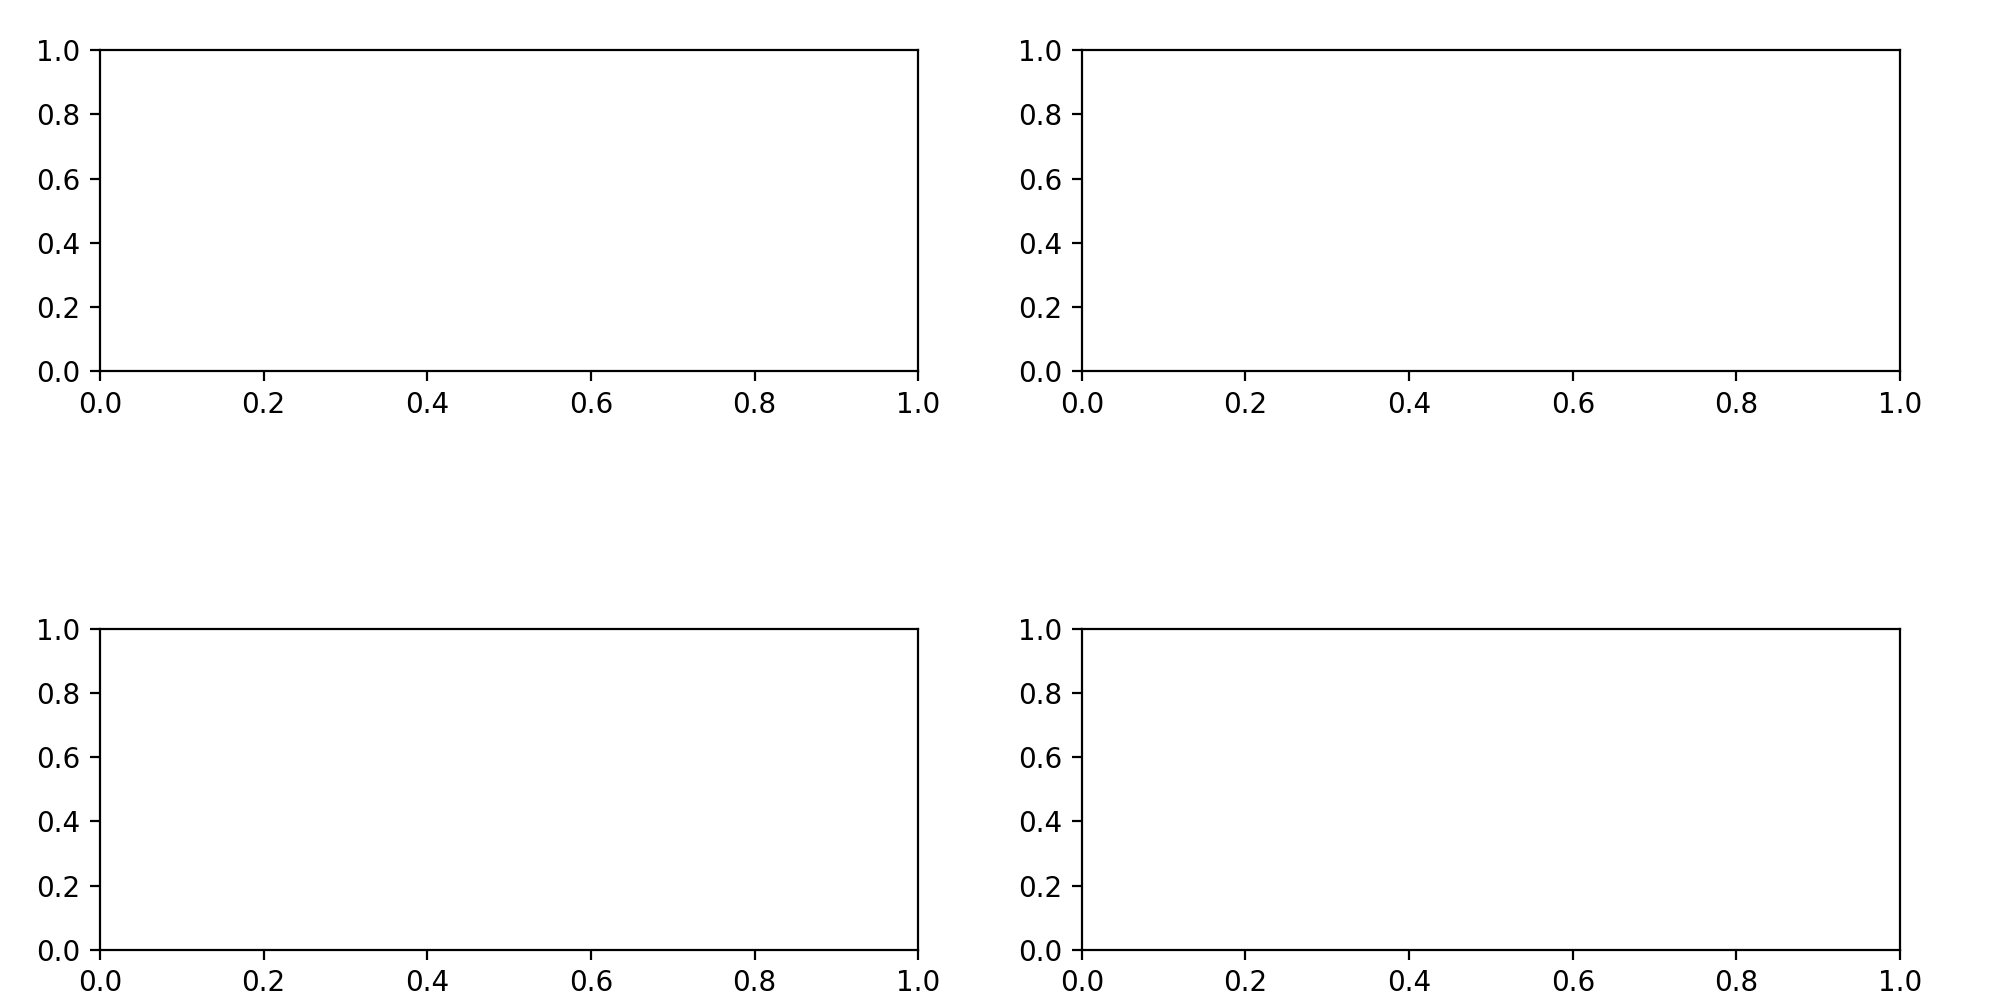

<IPython.core.display.Javascript object>


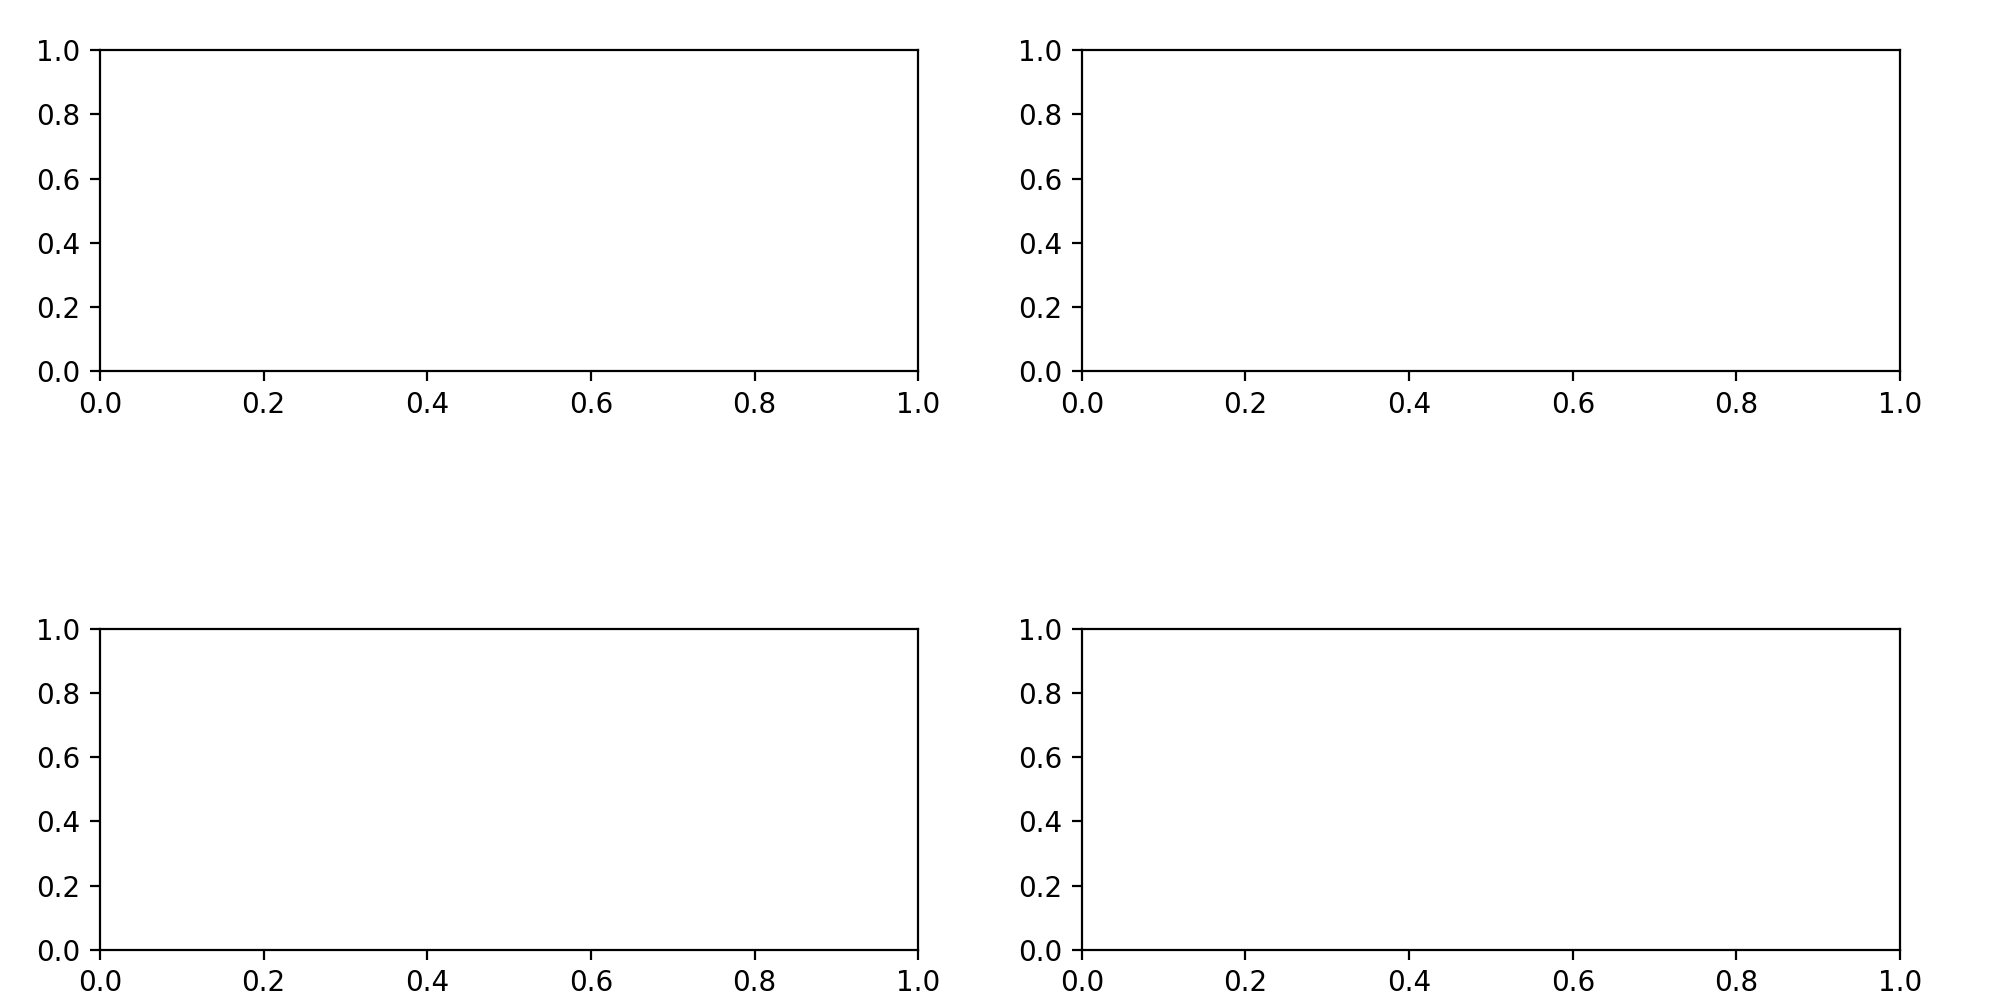

In [2]:
fig,ax = plt.subplots(2,2, figsize=(10,5))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

fig,ax1 = plt.subplots(2,2, figsize=(10,5))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

In [3]:
def waveforms(energystart, adjtime):
    energy = UTCDateTime(energystart)
    start_t = energy - adjtime
    end_t = energy + adjtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

In [4]:
t_377c = "2019-12-19T12:00:08"
st_377c = waveforms(t_377c, 20*60)
waveform_plotter(t_377c, st_377c, '377c', ax[0][0], channels= [0])

In [5]:
f_377c = waveform_filter(st_377c, 'lf')
waveform_plotter(t_377c, f_377c, '377c', ax[0][1], channels= [0])

[[  1.00000000e+00  -5.33128698e-17  -2.13662521e-17]
 [  1.08543274e-16   1.00000000e+00  -1.85037171e-17]
 [ -6.04692073e-17  -7.40148683e-17   1.00000000e+00]]


<IPython.core.display.Javascript object>


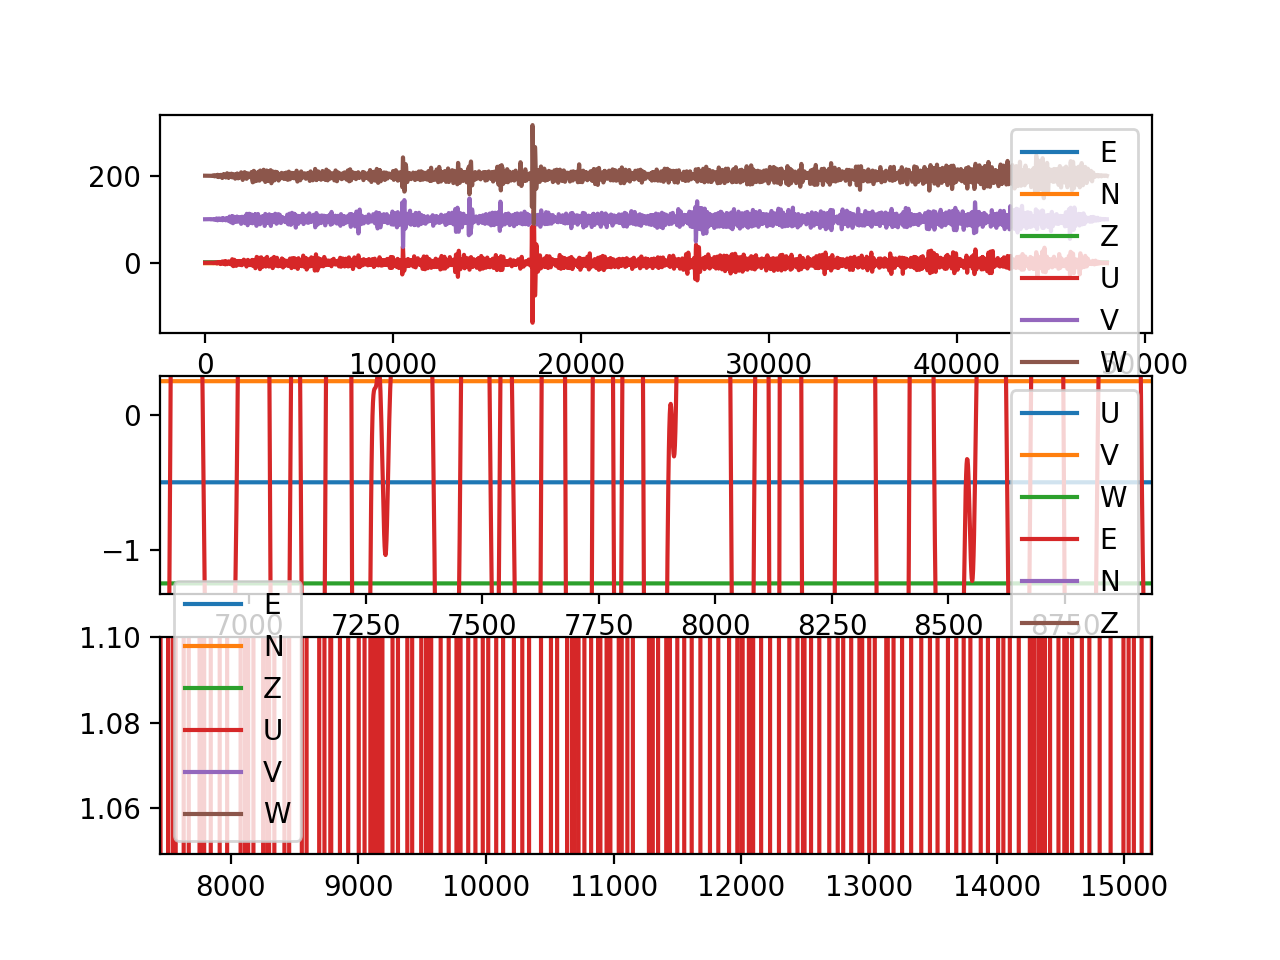

In [6]:
dU = st_377c[0].data
dV = st_377c[1].data
dW = st_377c[2].data


testN = -1*np.ones(len(dU))
testE = np.zeros(len(dU))
testZ = np.ones(len(dU))

d = np.radians(-30)
aU = np.radians(90)
aV = np.radians(210)
aW = np.radians(330)

A = np.array([[np.cos(d)*np.sin(aU),np.cos(d)*np.cos(aU),np.sin(d)],
    [np.cos(d)*np.sin(aV), np.cos(d)*np.cos(aV), np.sin(d)],
    [np.cos(d)*np.sin(aW), np.cos(d)*np.cos(aW), np.sin(d)]])

B = np.linalg.inv(A)
print(np.dot(B,A))

tU,tV,tW = np.dot(A,(testE,testN,testZ))

plt.subplot(311)
plt.plot(testE,label ='E')
plt.plot(testN,label ='N')
plt.plot(testZ,label ='Z')
plt.legend()

plt.subplot(312)
plt.plot(tU,label ='U')
plt.plot(tV,label ='V')
plt.plot(tW,label ='W')
plt.legend()

tE,tN,tZ = np.dot(B,(tU,tV,tW))

plt.subplot(313)
plt.plot(tE,label ='E')
plt.plot(tN,label ='N')
plt.plot(tZ,label ='Z')
plt.legend()

plt.show()




<IPython.core.display.Javascript object>


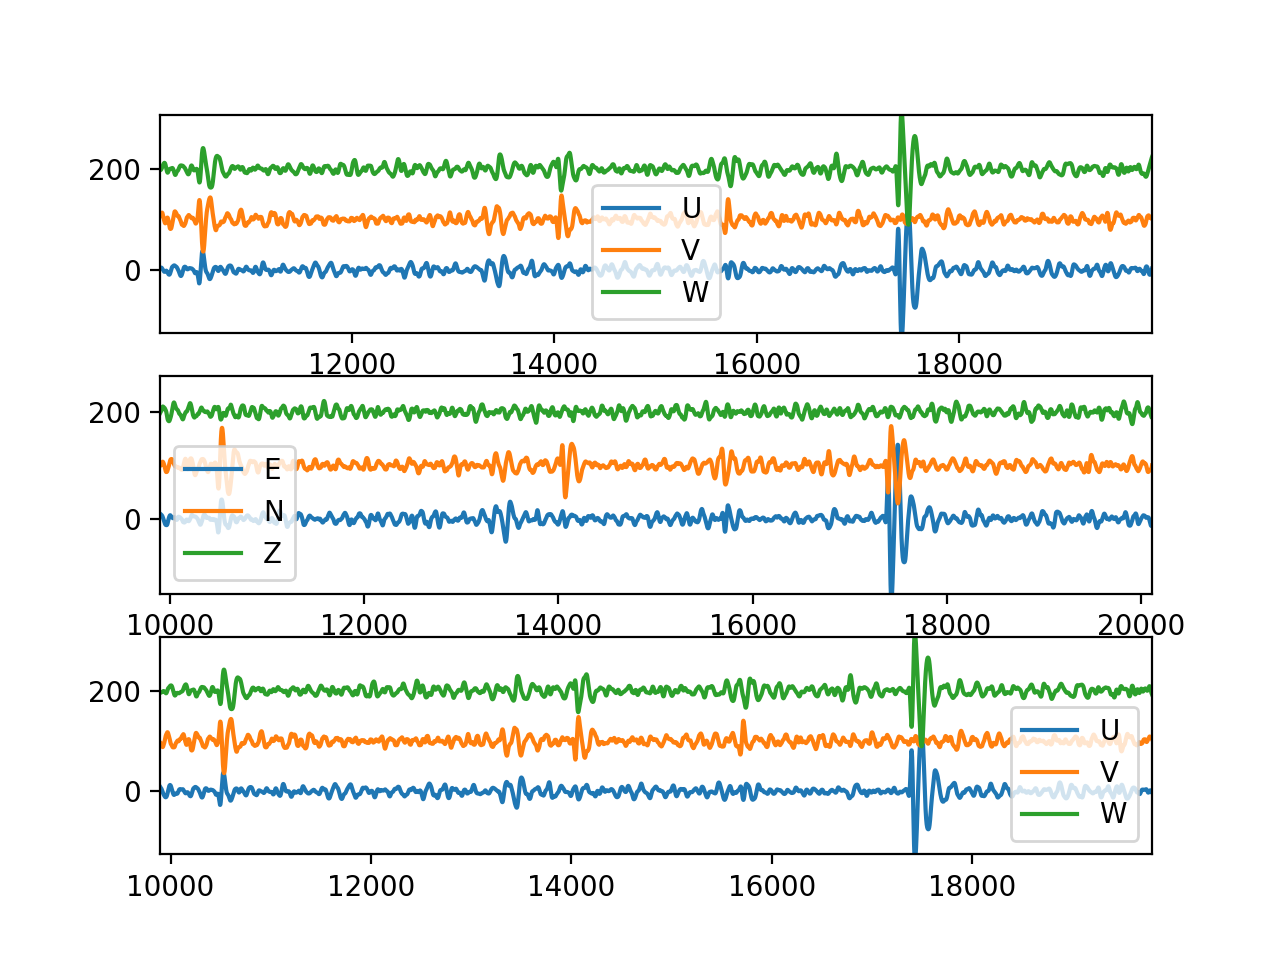

In [8]:
dE,dN,dZ = np.dot(B,(dU,dV,dW))

plt.subplot(311)
plt.plot(dU,label ='U')
plt.plot(dV+100,label ='V')
plt.plot(dW+200,label ='W')
plt.legend()

plt.subplot(312)
plt.plot(dE,label ='E')
plt.plot(dN+100,label ='N')
plt.plot(dZ+200,label ='Z')
plt.legend()

tU,tV,tW = np.dot(A,(dE,dN,dZ))

plt.subplot(313)
plt.plot(tU,label ='U')
plt.plot(tV+100,label ='V')
plt.plot(tW+200,label ='W')
plt.legend()

In [ ]:
def legend(ax, row, column):
    st = waveforms("2019-12-19T11:55:00", 20*60)
    tr = st[0]
    t = tr.times('matplotlib')
    y = np.zeros(len(t))

    ax[row,column].plot(t, y, label='BHU', color = "#1f77b4", alpha = 0.7)
    ax[row,column].plot(t, y, label='BHV', color = "#ff7f0e", alpha = 0.7)
    ax[row,column].plot(t, y, label='BHW', color = "#2ca02c", alpha = 0.7)
    ax[row,column].plot(t, y, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
    ax[row,column].plot(t, y, label='Horizontal 2', color = "#77e59b", alpha = 0.8)
    ax[row,column].plot(t, y, label = 'Vertical', color = "#ffabab", alpha = 0.8)
    
    ax[row,column].legend(fontsize = 'x-large', loc = 'center', facecolor = 'white', mode = 'expand', framealpha = 1)
    ax[row,column].get_xaxis().set_visible(False) 
    ax[row,column].get_yaxis().set_visible(False) 
    
legend(ax, 1,1)
legend(ax1, 0,0)

In [ ]:
#updating coefficients
params = ([np.radians(135.1),np.radians(-29.4)], [np.radians(15),np.radians(-29.2)], [np.radians(255),np.radians(-29.7)])

az = []
dp = []   

for azimuth, dip in params:
    az.append(azimuth)
    dp.append(dip)
    
print(az)
print(dp)

for comp in [0,1,2]:
    func = (-(np.sin(-az[comp])))*(np.cos(dp[comp])) , (np.cos(-az[comp]))*(np.cos(-dp[comp])) , np.sin(-dp[comp])    
    
    if comp == 0:
        U = func
    elif comp == 1:
        V = func
    elif comp == 2:
        W = func

matrix = np.array([U,V,W])
print(matrix)

inverse = np.linalg.inv(matrix)
print(inverse)

print(np.dot(inverse, matrix))

In [ ]:
print(float(inverse[1,1]))

In [ ]:
u1 = float(inverse[0,0])
u2 = float(inverse[1,0])
u3 = float(inverse[2,0])

v1 = float(inverse[0,1])
v2 = float(inverse[1,1])
v3 = float(inverse[2,1])

w1 = float(inverse[0,2])
w2 = float(inverse[1,2])
w3 = float(inverse[2,2])

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(10,5))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

for chan in [0,1]:
    for chann in [0,1]:
        ax[chan,chann].xaxis_date()
        x_labels = ax[chan,chann].get_xticklabels()
        ax[chan,chann].set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
        ax[chan,chann].xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        ax[chan,chann].xaxis.set_major_locator(ticker.MaxNLocator(8))

In [ ]:
#old plotter of Z12 coefficients
date = "2019-12-19T12:00:08"
d = date[0:10]
    
for channel in [0,1,2]:
    full_code = f_377c[channel].id
    code = full_code[12:]
        
    tr = f_377c[channel]
    t = tr.times('matplotlib')
        
    if code == 'BHU':
        U = f_377c[channel].data
    elif code == 'BHV':
        V = f_377c[channel].data
    elif code == 'BHW':
        W = f_377c[channel].data
            
h1 = (-2)*U + V + W
h2 = math.sqrt(3)*V - math.sqrt(3)*W
z = math.sqrt(2)*U + math.sqrt(2)*V + math.sqrt(2)*W

offset = np.full(len(z), fill_value=500)

ax[0,0].plot(t, h1, label='Horizontal 1', color = "black", alpha = 0.5)
ax[0,1].plot(t, h2, label='Horizontal 2', color = "black", alpha = 0.5)
ax[1,0].plot(t, z, label = 'Vertical', color = "black", alpha = 0.5)

In [ ]:
#updating matrix coefficients 
h11 = u1*U + v1*V + w1*W
h22 = u2*U + v2*V + w2*W
z0 = u3*U + v3*V + w3*W

offset = np.full(len(z), fill_value=50)

ax[0,0].plot(t, h11, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
ax[0,1].plot(t, h22, label='Horizontal 2', color = "#77e59b", alpha = 0.8)
ax[1,0].plot(t, z0, label = 'Vertical', color = "#ffabab", alpha = 0.8)

ax[1,1].plot(t, h11 + 2*offset, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
ax[1,1].plot(t, h22 + offset, label='Horizontal 2', color = "#77e59b", alpha = 0.8)
ax[1,1].plot(t, z0, label = 'Vertical', color = "#ffabab", alpha = 0.8)